In [ ]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 6.1 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=4c429a29d105e2eb1c10f629b5d380302107c853f76b2c79abfe2d9a31af6d98
  Stored in directory: /root/.cache/pip/wheels/4b

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 58.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from yahoofinancials import YahooFinancials

## Descarga de la información.

Utilizaremos la API de yfinance para descargar la información de la serie de tiempo del S&P 500 desde el 1-enero-2000 al 31-dic-2021

In [ ]:
## Obetemenos los datos del servidor de Yahoo
sp500 = yf.download('^GSPC',
                  start='2000-01-01',
                  end='2021-12-31',
                  progress=False)

In [ ]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [ ]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5535.000000,5535.000000,5535.000000,5535.000000,5535.000000,5.535000e+03
mean,1772.102924,1782.233612,1761.197519,1772.378729,1772.378729,3.208542e+09
std,856.734841,859.780494,853.671921,857.084851,857.084851,1.510020e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1173.785034,1182.119995,1166.144958,1173.805054,1173.805054,1.855095e+09
50%,1409.119995,1415.890015,1399.250000,1409.119995,1409.119995,3.298780e+09
75%,2123.404907,2130.660034,2115.059937,2125.030029,2125.030029,4.027815e+09
max,4795.490234,4808.930176,4780.040039,4793.060059,4793.060059,1.145623e+10


Graficaremos la serie para comenzar con el análisis.

## Pruebas de estacionariedad para S&P 500

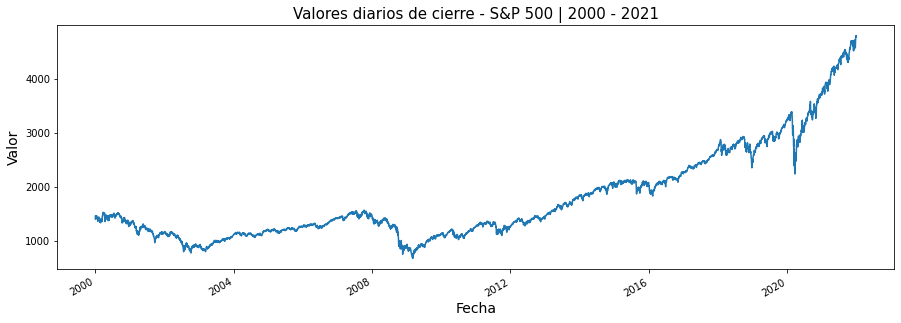

In [ ]:
## Gráfica de los datos para el análisis de estacionariedad
sp500['Close'].plot(figsize = (15,5))
plt.title("Valores diarios de cierre - S&P 500 | 2000 - 2021", fontsize=15)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Valor",fontsize=14)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Historico_Ciere.png')
plt.show()

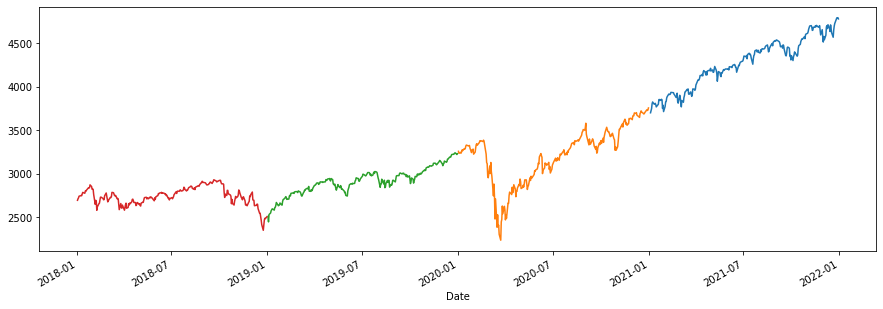

In [ ]:
sp500['Close']['2021'].plot(figsize = (15,5))
sp500['Close']['2020'].plot(figsize = (15,5))
sp500['Close']['2019'].plot(figsize = (15,5))
sp500['Close']['2018'].plot(figsize = (15,5))

In [ ]:
sp500['ANNO'] = sp500.index.year
sp500['MES'] = sp500.index.month

In [ ]:
sp500['Media_Movil'] = sp500['Close'].rolling('360D').mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde5b7b6890>,
      dtype=object)

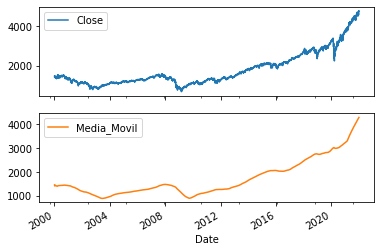

In [ ]:
sp500[['Close', 'Media_Movil']].plot(subplots=True)

In [ ]:
# Importamos la función de la prueba aumentada de dickey fuller
from statsmodels.tsa.stattools import adfuller

# Corremos el test sobre la serie
result = adfuller(sp500['Close'])

# Imprimimos el estadístico y su p-value
print("Estadístico de Dickey Fuller para S&P 500: " + '% 6.2f' %result[0])
print("p-value:" + '% 6.2f' %result[1])

# Regresamos los valores críticos
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico de Dickey Fuller para S&P 500:   3.29
p-value:  1.00
Valores Críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


La prueba ADF nos indica que no podemos rechazar la hipótesis nula, por lo que la serie es no estacionaria al contar con un componente de tendencia.

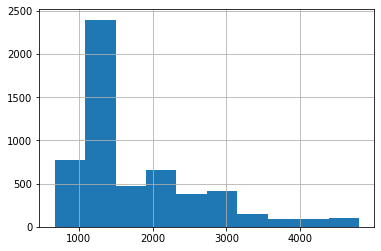

In [ ]:
sp500['Close'].hist()
plt.show()

Intentaremos hacer que la serie sea estacionaria diferenciándola

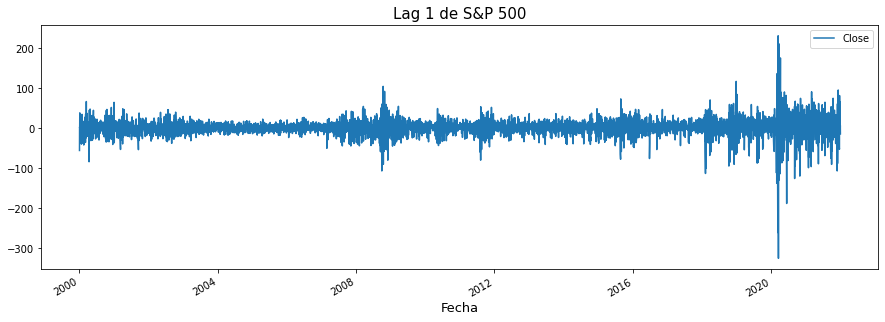

Estadístico de Dickey Fuller para Diff(S&P 500): -15.26
p-value:  0.00
Valores Críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# Aplicamos el operador de lag para 1 periodo de tiempo
sp500_diff  = sp500.diff().dropna()

result = adfuller(sp500_diff['Close'])


## Hacemos una gráfica de las diferencias
sp500_diff[['Close']].plot(figsize =(15,5))
plt.title('Lag 1 de S&P 500', fontsize = 15 )
plt.xlabel('Fecha', fontsize= 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/LAG_Cierre.png')
plt.show()

# Imprimimos el estadístico y su p-value
print("Estadístico de Dickey Fuller para Diff(S&P 500): " + '% 6.2f' %result[0])
print("p-value:" + '% 6.2f' %result[1])

# Regresamos los valores críticos
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Parece que aplicando el operador de diferencia hemos logrado que la serie tenga un comportamiento estacionario. Sin embargo, la varianza de la misma parece no ser constante, se aprecia un cambio para las fechas posteriores a 2020.



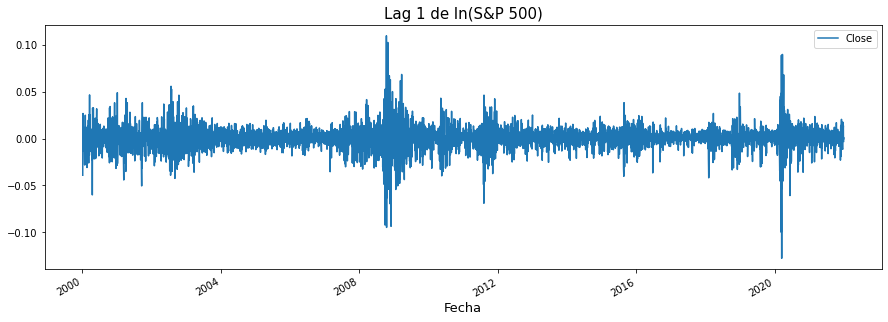

Estadístico de Dickey Fuller para Diff(ln(S&P 500)): -13.81
p-value:  0.00
Valores Críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# Aplicamos el operador de lag para 1 periodo de tiempo
sp500_diff  = np.log(sp500).diff().dropna()

result = adfuller(sp500_diff['Close'])


## Hacemos una gráfica de las diferencias
sp500_diff[['Close']].plot(figsize =(15,5))
plt.title('Lag 1 de ln(S&P 500)', fontsize = 15 )
plt.xlabel('Fecha', fontsize= 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Log_LAG_Cierre.png')
plt.show()

# Imprimimos el estadístico y su p-value
print("Estadístico de Dickey Fuller para Diff(ln(S&P 500)): " + '% 6.2f' %result[0])
print("p-value:" + '% 6.2f' %result[1])

# Regresamos los valores críticos
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

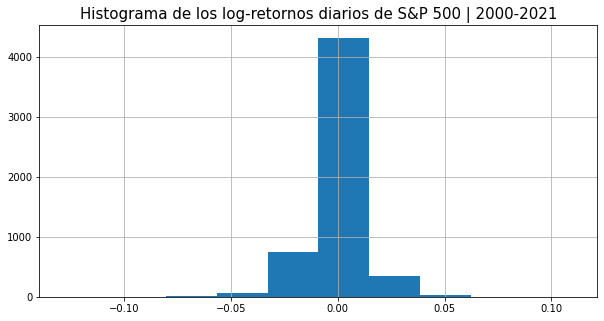

In [ ]:
plt.figure(figsize = (10,5))
sp500_diff['Close'].hist()
plt.title('Histograma de los log-retornos diarios de S&P 500 | 2000-2021', fontsize = 15)
plt.show()

Estimación de los parámetros p,q.

In [ ]:
## Importamos las funciones de acf y pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Pasaremos a graficar e inspeccionar las gráficas de autocorrelación y autocorrelación parcial para dar una idea de los posibles mejores parámetros para el modelo.

<Figure size 720x360 with 0 Axes>

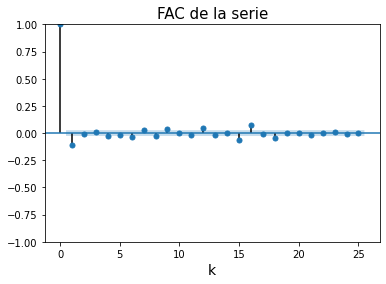

In [ ]:
## Importamos las funciones de acf y pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## FAC
plt.figure(figsize=(10,5))
plot_acf(sp500_diff['Close'], lags = 25)
plt.title('FAC de la serie', fontsize =15)
plt.xlabel('k', fontsize = 14)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/FAC.png')
plt.show()



/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


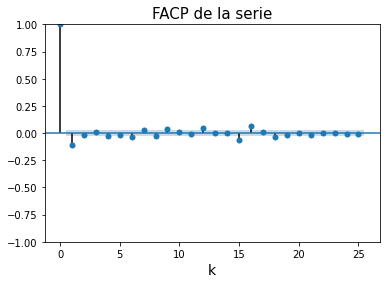

In [ ]:
## FACP
plot_pacf(sp500_diff['Close'], lags = 25)
plt.title('FACP de la serie', fontsize = 15)
plt.xlabel('k', fontsize = 14)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/FACP.png')
plt.show()

Dado el comportamiento de las graficas, se sugiere que un modelo adecuado para este problema es un ARMA(2,2). Ya que la ACF se corta después del lag-2 y la funcion PACF tiene un decaimiento.

Pasaemos a contrastar si lo observado es el modelo que reduce de mejor manera el AIC.

**Definimos los tamaños de los conjuntos de entrenamiento y prueba para el desarrollo del modelo**

In [ ]:
## Definición de los conjuntos de entrenamiento y prueba
train_len = len(sp500['Close'])-60

train = sp500['Close'][0:train_len]
test = sp500['Close'][train_len:]

In [ ]:
train_len

5475

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Creación de una lista vacía que alamacenará la información para cada modelo
order_aic_bic=[]

# Iteración sobre los valores de p de 0-4
for p in range(4):
  # Iteración sobre q 0-4
    for q in range(4):
      	# Creación y ajuste del modelo de orden (p,1,q)
        model = SARIMAX(train, order=(p, 1, q))
        results = model.fit()

        # Anexamos los estadísticos de AIC, BIC así como los ordenes utilizados
        order_aic_bic.append((p, q, results.aic, results.bic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print('Criterio AIC')
print(order_df.sort_values('AIC'))

print('-'*99)

# Print order_df in order of increasing BIC
print('Criterio BIC')
print(order_df.sort_values('BIC'))

Criterio AIC
    p  q           AIC           BIC
14  3  2  48767.214218  48806.860807
10  2  2  48767.470048  48800.508872
15  3  3  48769.750272  48816.004626
13  3  1  48857.192362  48890.231186
11  2  3  48911.611184  48951.257774
7   1  3  48913.685694  48946.724519
3   0  3  48915.470390  48941.901450
2   0  2  48915.973083  48935.796378
8   2  0  48916.416026  48936.239320
6   1  2  48916.674438  48943.105497
12  3  0  48918.026749  48944.457808
9   2  1  48918.274927  48944.705987
5   1  1  48920.430472  48940.253766
4   1  0  48929.586462  48942.801992
1   0  1  48943.339291  48956.554821
0   0  0  49051.348256  49057.956021
---------------------------------------------------------------------------------------------------
Criterio BIC
    p  q           AIC           BIC
10  2  2  48767.470048  48800.508872
14  3  2  48767.214218  48806.860807
15  3  3  48769.750272  48816.004626
13  3  1  48857.192362  48890.231186
2   0  2  48915.973083  48935.796378
8   2  0  48916.416026 

Segùn el criterio del AIC, el modelo que mejor ajusta es un ARMA(3,2); de ahì es seguido por un modelo ARMA(2,2). Entrenaremos los dos para verificar las hipópetsis que presenta el modelo.

Al entrenar el modelo, observamos lo siguiente:

Los coeficientes de los rezagos NO SON ADMISIBLES; al ser superiores a 1, esto indicaría que se necesita algún nùmero adicional de diferenciaciones para disminuir los coeficientes.

## Entrenamiento del modelo ARIMA (3,1,2)

In [ ]:
# Creamos la instancia del modelo.
model = SARIMAX(train, order=(3, 1, 2))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5475
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -24377.607
Date:                Mon, 21 Mar 2022   AIC                          48767.214
Time:                        22:39:31   BIC                          48806.861
Sample:                             0   HQIC                         48781.046
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7665      0.015   -116.775      0.000      -1.796      -1.737
ar.L2         -0.9355      0.020    -46.015      0.000      -0.975      -0.896
ar.L3         -0.0267      0.007     -3.620      0.0

In [ ]:
results.params

ar.L1      -1.766457
ar.L2      -0.935506
ar.L3      -0.026667
ma.L1       1.651118
ma.L2       0.782909
sigma2    432.147731
dtype: float64

Adicional, generaremos las gráficas diagnòstico para verificar la validez del modelo.

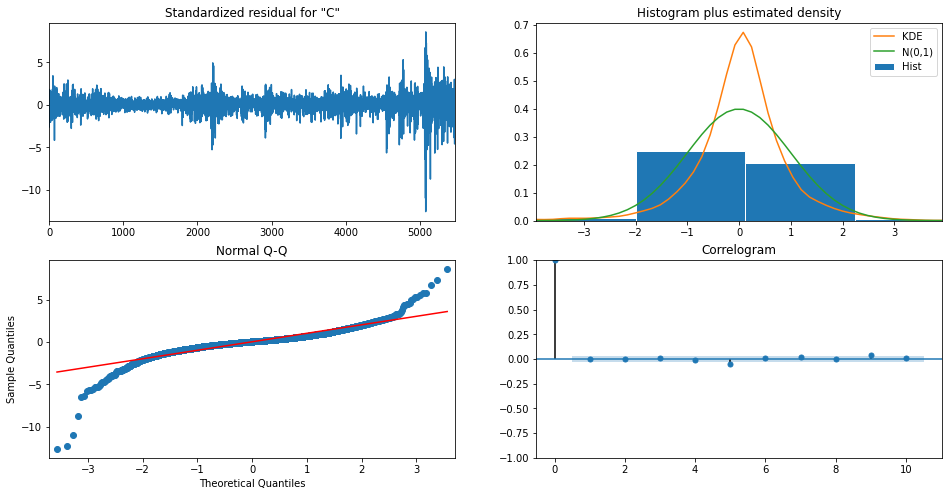

In [ ]:
## Grafica diagnóstico de los residuales.
results.plot_diagnostics(figsize=(16,8))
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Diagnstico_Full_SP.png')
plt.show()

Prueba de Kolmogorov para contraste de distribuciones

In [ ]:
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.02680494533479888 0.4668978082178785


In [ ]:
results.resid

Date
2000-01-03    1455.219971
2000-01-04     -55.700484
2000-01-05      -5.706187
2000-01-06       4.707632
2000-01-07      38.096080
                 ...     
2021-09-29       0.247786
2021-09-30     -50.211293
2021-10-01      44.473172
2021-10-04     -51.649291
2021-10-05      40.697577
Length: 5475, dtype: float64

In [ ]:
ks_statistic, p_value = kstest(results.resid, 'norm')
print(ks_statistic, p_value)

0.4524135082856844 0.0


Se observan los mismos resultados que los arrojados por a prueba de Jarque-Bera, por lo que podemos confirmar la no normalidad de ls residuales. Pasaremos a hacer estimaciones a un año, determinando la capacidad del modelo para predecir.

Definir N, p, d como variables para que sea más fácil comprobar los resultados y las medias.

**Verificación del modelo**

1. Residuos con media cero.
2. Varianza de los residuos constante.
3. Independencia de los residuales (prueba de Ljung-Box).
4. Distirbución normal de los residuales (prueba no tan exigente).
5. No observaciones aberrantes (-3sigma,  3 sigma).

No tan necesrias:
6. Modelo cumple supuesto de parsimonia (verificado con seleccion por AIC-BIC).
7. El modelo es admisible (parámetros se encuentran en las regiones admisibles).
Valores de los coeficientes deben oscilar entre (-1,1) en caso de que se slgan de ese rango, podría indicar que se necesita una diferenciación adicional
8. Modelo estable en los parámetros.


De la inspeccion visual, podemos apreciar que el modelo no es admisible por diversos motivos:
1. Tiene coneficientes mayores a los permisibles.
2. Varianaza de los residuales no es constante.
3. Residuales no se distribuyn de forma normal, sino con una distribuciòn de colas más pesadas.
4. Existen resifuales que estàn correlacionados entre sì (Aunque se pasa la preba de Ljung - Box).



**1. Comprobación de que la media de los residuos es cercana a cero, contrastando si el cociente de M/sigma no sobrepasa 2**

Recordemos que deemosde tomar los residuos a partir de: d+p+1

In [ ]:
N = len(train)
p = 3
d = 1
q = 2

t_prima = d+p+1  ## Sustento con base en el libro de Victor Guerrero.

In [ ]:
## Extracción de los residuales
residuos_2 = results.resid[t_prima:]

In [ ]:
## Computo de la media muestral

multiplicador = np.sqrt(N-d-p)
multiplicador

N = len(train)
p = 3
d = 1
q = 2

media_mu = np.sum(residuos_2)/(multiplicador**2)
print(media_mu)

0.5763331217401495


La media de los residuos es un poco alta al cero esperado, pero contrastaremos calculando el cociente de:

$$
    m(a)/\sigma_{a}
$$


In [ ]:
## Calculo de la varianza muestral
num_sigma = N-d-p-q
sigma_mu = np.sqrt(np.sum((residuos_2-media_mu)**2)/(num_sigma))
print(sigma_mu)

20.770427743898466


In [ ]:
sigma_mu = np.sqrt(np.sum((residuos_2-media_mu)**2)/(num_sigma))
sigma_mu

20.770427743898466

Es muy similar a la sigma_2 otorgada por el modelo de facto, por lo que la tomaremos de ahi.

In [ ]:
sigma_mu = np.sqrt(results.params[-1])
sigma_mu

20.788163236814636

In [ ]:
cociente = multiplicador*media_mu/sigma_mu
cociente

2.0506465801229656

El cociente sobrepasa el valor de 2, por lo que no puede ser admitido como un modelo vàlido para la serie de tiempo.

**4. Intervalo -2sigma_mu, 2_sigma_mu**


In [ ]:
# Observaciones admisibles fuera del rango de dist Normal
np.round((N-d-p)/20)

274.0

In [ ]:
#Calculamos el intervalo
c_inf = (-2*sigma_mu) + media_mu
c_sup = (2*sigma_mu) + media_mu

## Calculo intervalo de observaciones aberrantes
ab_inf = (-3*sigma_mu) + media_mu
ab_sup = (3*sigma_mu) + media_mu

# Imprimimos intervalo
print("Intervalo = (%.2f,%.2f)" %(c_inf, c_sup))

Intervalo = (-41.00,42.15)


In [ ]:
fuera_intervalo = np.sum(residuos_2<c_inf) + np.sum(residuos_2>c_sup)
fuera_intervalo

254

Observamos que se cumple el supuesto de que no se tengan observaciones por encima del esperado que salgan del intervalo (-2*sigma, 2*sigma)

In [ ]:
## Número de observaciones aberrantes:
np.sum(residuos_2<ab_inf) + np.sum(residuos_2>ab_sup)


88

Sin embargo, tenemos 82 observaciones aberrantes.

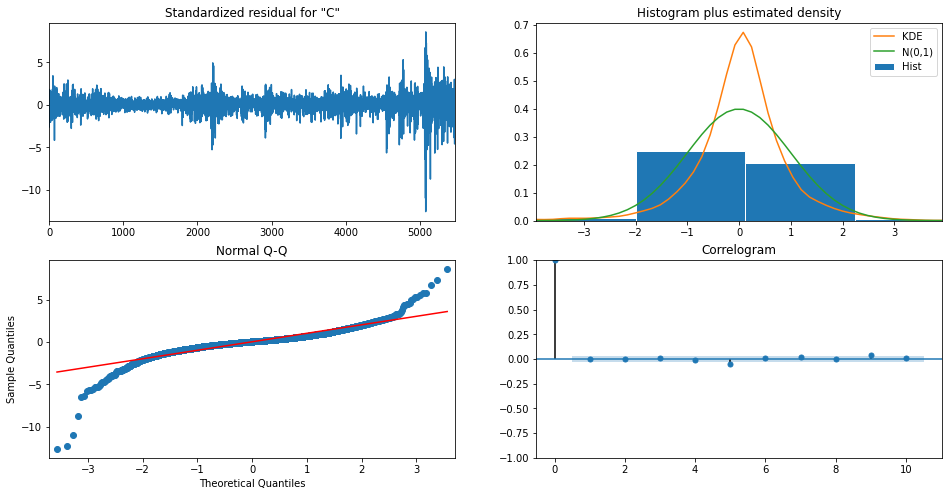

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

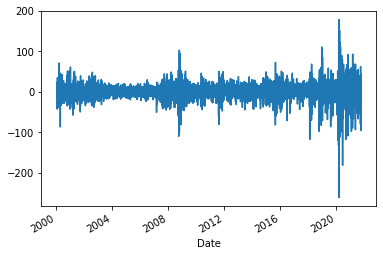

In [ ]:
residuos_2.plot()

Graficando los residuales, podemos observar que las observaciones aberrantes ocurren en las fechas donde se han tendio eventos que han afectado de manera considerable a los mercados:

Crisis de los 2000, crisis del 2008 y el inicio de la pandemia por covid en principios del año 2020.

Todos estos efectos observados podrían estar perjudicando al modelo.

## ARIMA (2,1,2) SP 500 total

In [ ]:
N = len(train)
p = 2
d = 1
q = 2

t_prima = d+p+1  ## Sustento con base en el libro de Victor Guerrero.

In [ ]:
# Creamos la instancia del modelo.
# create and fit ARMA(p,q) model
model = SARIMAX(train, order=(p, d, q))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5475
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -24378.735
Date:                Mon, 21 Mar 2022   AIC                          48767.470
Time:                        22:55:27   BIC                          48800.509
Sample:                             0   HQIC                         48778.997
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7213      0.007   -233.002      0.000      -1.736      -1.707
ar.L2         -0.8725      0.007   -122.336      0.000      -0.887      -0.859
ma.L1          1.6197      0.009    171.395      0.0

In [ ]:
results.params

ar.L1      -1.721316
ar.L2      -0.872522
ma.L1       1.619736
ma.L2       0.757975
sigma2    432.311919
dtype: float64

Adicional, generaremos las gráficas diagnòstico para verificar la validez del modelo.

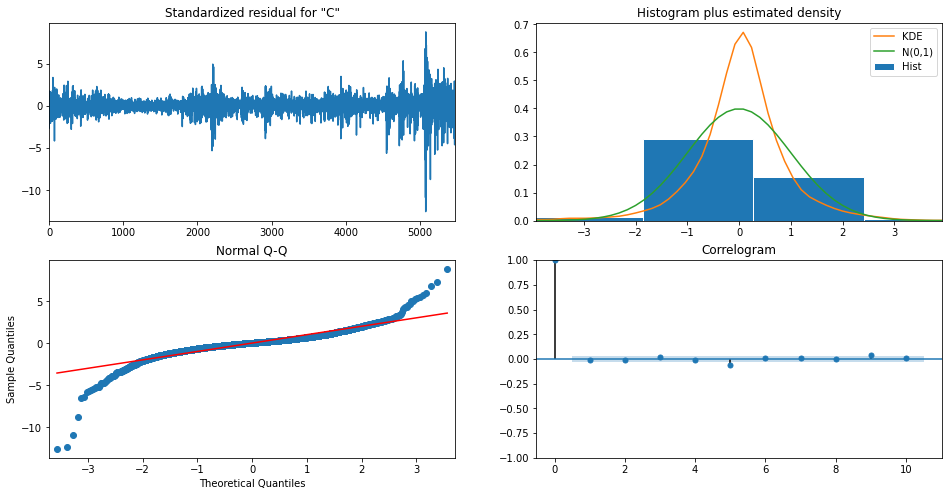

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

Prueba de Kolmogorov para contraste de distribuciones

In [ ]:
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.018392799945408322 0.887630293492193


In [ ]:
results.resid

Date
2000-01-03    1455.219971
2000-01-04     -55.707969
2000-01-05      -5.085166
2000-01-06       5.390197
2000-01-07      37.815078
                 ...     
2021-09-29       1.587500
2021-09-30     -49.224016
2021-10-01      44.615388
2021-10-04     -51.630730
2021-10-05      40.868642
Length: 5475, dtype: float64

In [ ]:
ks_statistic, p_value = kstest(results.resid, 'norm')
print(ks_statistic, p_value)

0.45108186386805127 0.0


Se observan los mismos resultados que los arrojados por a prueba de Jarque-Bera, por lo que podemos confirmar la no normalidad de ls residuales. Pasaremos a hacer estimaciones a un año, determinando la capacidad del modelo para predecir.

Definir N, p, d como variables para que sea más fácil comprobar los resultados y las medias.

**Verificación del modelo**

1. Residuos con media cero.
2. Varianza de los residuos constante.
3. Independencia de los residuales (prueba de Ljung-Box).
4. Distirbución normal de los residuales (prueba no tan exigente).
5. No observaciones aberrantes (-3sigma,  3 sigma).

No tan necesrias:
6. Modelo cumple supuesto de parsimonia (verificado con seleccion por AIC-BIC).
7. El modelo es admisible (parámetros se encuentran en las regiones admisibles).
Valores de los coeficientes deben oscilar entre (-1,1) en caso de que se slgan de ese rango, podría indicar que se necesita una diferenciación adicional
8. Modelo estable en los parámetros.


De la inspeccion visual, podemos apreciar que el modelo no es admisible por diversos motivos:
1. Tiene coneficientes mayores a los permisibles.
2. Varianaza de los residuales no es constante.
3. Residuales no se distribuyn de forma normal, sino con una distribuciòn de colas más pesadas.
4. Existen resifuales que estàn correlacionados entre sì (Aunque se pasa la preba de Ljung - Box).



**1. Comprobación de que la media de los residuos es cercana a cero, contrastando si el cociente de M/sigma no sobrepasa 2**

Recordemos que deemosde tomar los residuos a partir de: d+p+1

In [ ]:
multiplicador = np.sqrt(N-d-p)
multiplicador

73.97296803562772

In [ ]:
residuos_2 = results.resid[t_prima:]

In [ ]:
media_mu = np.sum(residuos_2)/(multiplicador**2)
media_mu

0.571508192010241

La media de los residuos es un poco alta al cero esperado, pero contrastaremos calculando el cociente de:

$$
    m(a)/\sigma_{a}
$$


In [ ]:
num_sigma = N-d-p-q

In [ ]:
sigma_mu = np.sqrt(np.sum((residuos_2-media_mu)**2)/(num_sigma))
sigma_mu

20.77932568483956

Es muy similar a la sigma_2 otorgada por el modelo de facto, por lo que la tomaremos de ahi.

In [ ]:
sigma_mu = np.sqrt(results.params[-1])
sigma_mu

20.792111931406698

In [ ]:
cociente = multiplicador*media_mu/sigma_mu
cociente

2.033278647168803

El cociente sobrepasa el valor de 2, por lo que no puede ser admitido como un modelo vàlido para la serie de tiempo.

**4. Intervalo -2sigma_mu, 2_sigma_mu**


In [ ]:
# Observaciones admisibles fuera del rango de dist Normal
np.round((N-d-p)/20)

274.0

In [ ]:
#Calculamos el intervalo
c_inf = (-2*sigma_mu) + media_mu
c_sup = (2*sigma_mu) + media_mu

ab_inf = (-3*sigma_mu) + media_mu
ab_sup = (3*sigma_mu) + media_mu
# Imprimimos el estadístico y su p-value
#print("Estadístico de Dickey Fuller para Diff(ln(S&P 500)): " + '% 6.2f' %result[0])
#print("p-value:" + '% 6.2f' %result[1])
#print('\t%s: %.3f' % (key, value))
print("Intervalo = (%.2f,%.2f)" %(c_inf, c_sup))

Intervalo = (-41.01,42.16)


In [ ]:
fuera_intervalo = np.sum(residuos_2<c_inf) + np.sum(residuos_2>c_sup)
fuera_intervalo

255

Observamos que se cumple el supuesto de que no se tengan observaciones por encima del esperado que salgan del intervalo (-2*sigma, 2*sigma)

In [ ]:
## Número de observaciones aberrantes:
np.sum(residuos_2<ab_inf) + np.sum(residuos_2>ab_sup)


88

Sin embargo, tenemos 82 observaciones aberrantes.

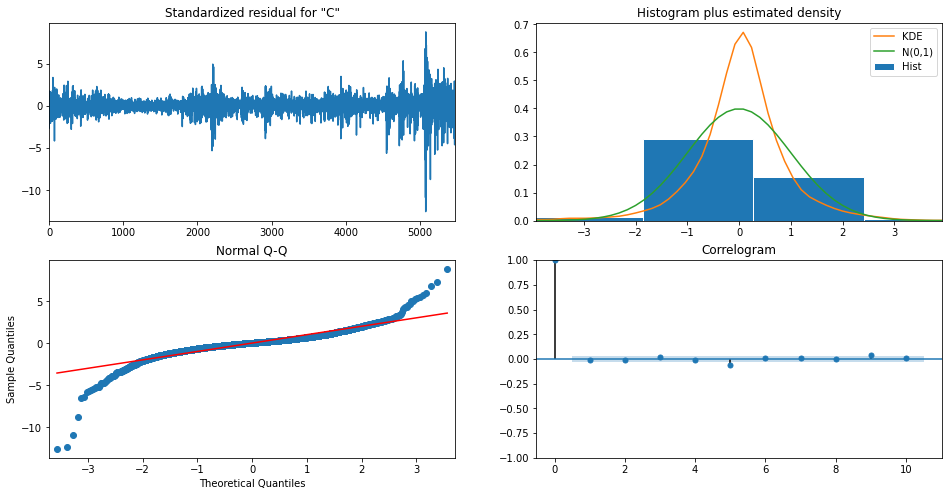

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

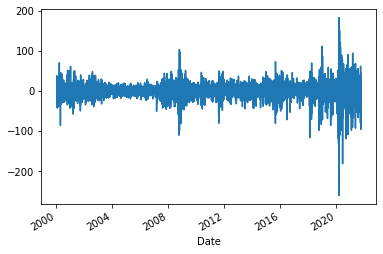

In [ ]:
residuos_2.plot()

Graficando los residuales, podemos observar que las observaciones aberrantes ocurren en las fechas donde se han tendio eventos que han afectado de manera considerable a los mercados:

Crisis de los 2000, crisis del 2008 y el inicio de la pandemia por covid en principios del año 2020.

Todos estos efectos observados podrían estar perjudicando al modelo.

## Prueba de modelo con un periodo de tiempo posterior a 2020

PAra mitigar los efectos observados por las variaciones del ìndice, tomaremos como una base un menor nùmero de periodos, a partir de 2020, tratando de observar el performace de los modelos

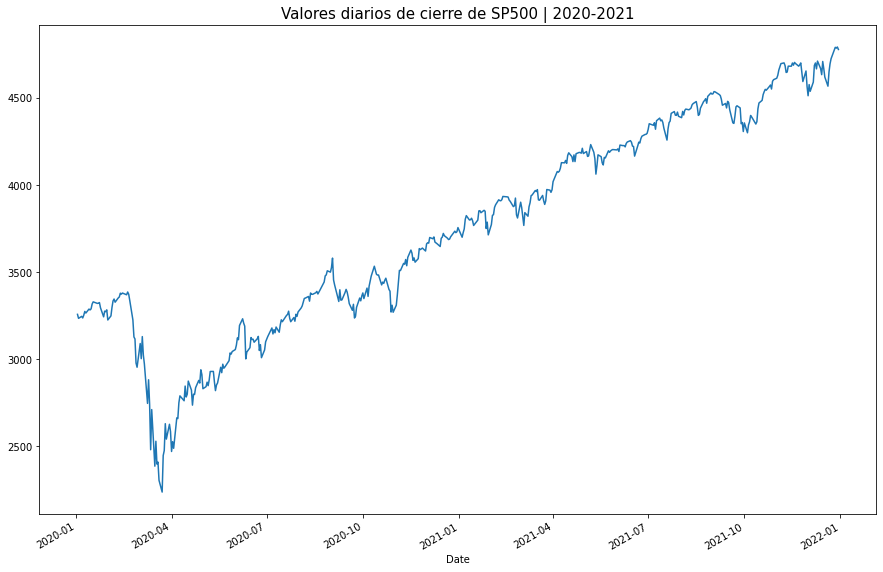

In [ ]:
sp500_2020  = sp500['2020':]
plt.figure(figsize = (15,10))
sp500_2020['Close'].plot()
plt.title('Valores diarios de cierre de SP500 | 2020-2021', fontsize = 15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Cierre_2020.png')
plt.show()

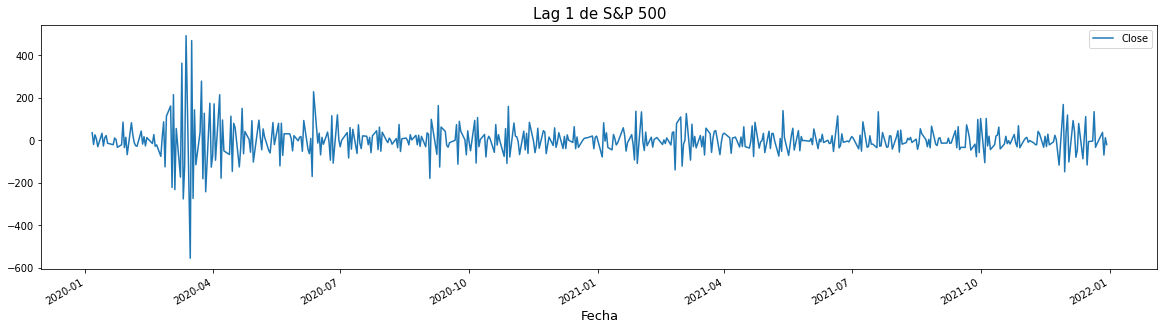

Estadístico de Dickey Fuller para Diff(SP500): -10.15
p-value:  0.00
Valores Críticos:
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [ ]:
# Aplicamos el operador de lag para 1 periodo de tiempo
sp500_diff  = sp500_2020.diff().diff().dropna()

result = adfuller(sp500_diff['Close'])


## Hacemos una gráfica de las diferencias
sp500_diff[['Close']].plot(figsize =(20,5))
plt.title('Lag 1 de S&P 500', fontsize = 15 )
plt.xlabel('Fecha', fontsize= 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/LAG_Cierre_2020.png')
plt.show()

# Imprimimos el estadístico y su p-value
print("Estadístico de Dickey Fuller para Diff(SP500): " + '% 6.2f' %result[0])
print("p-value:" + '% 6.2f' %result[1])

# Regresamos los valores críticos
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Al parecer, es a partir de julio que los valores de la diferencia se estabilizan.

2021-10-06

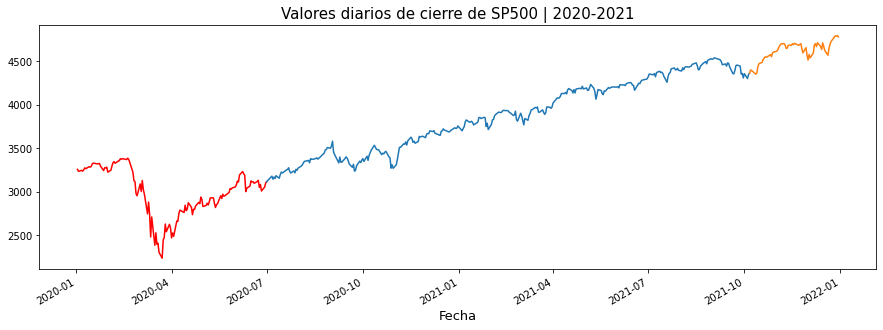

In [ ]:
## Fitro de la información.
sp500_2020  = sp500['07-01-2020':]
plt.figure(figsize = (15,5))

sp500['Close']['01-01-2020':'07-01-2020'].plot(label = 'Omisión 2020', color = 'r')
sp500['Close']['07-01-2020':'10-06-2021'].plot(label = 'Entrenamiento')
sp500['Close']['10-06-2021':].plot(label = 'Prueba')
plt.xlabel('Fecha',fontsize= 13)
plt.title('Valores diarios de cierre de SP500 | 2020-2021', fontsize = 15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Cierre_2020_fin.png')
plt.show()

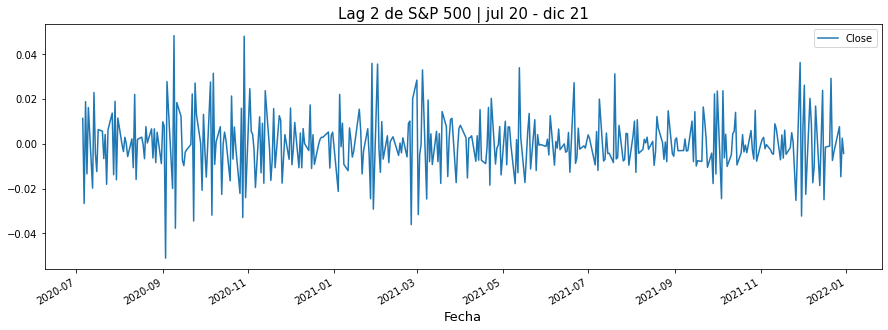

Estadístico de Dickey Fuller para Diff(SP500):  -8.12
p-value:  0.00
Valores Críticos:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [ ]:
# Aplicamos el operador de lag para 2 periodos de tiempo
sp500_diff  = np.log(sp500_2020).diff().diff().dropna()

result = adfuller(sp500_diff['Close'])


## Hacemos una gráfica de las diferencias
sp500_diff[['Close']].plot(figsize =(15,5))
plt.title('Lag 2 de S&P 500 | jul 20 - dic 21', fontsize = 15 )
plt.xlabel('Fecha', fontsize= 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/LAG_Cierre_2020_fin.png')
plt.show()

# Imprimimos el estadístico y su p-value
print("Estadístico de Dickey Fuller para Diff(SP500): " + '% 6.2f' %result[0])
print("p-value:" + '% 6.2f' %result[1])

# Regresamos los valores críticos
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
np.log(sp500_2020['Close']).diff()

Date
2020-07-01         NaN
2020-07-02    0.004531
2020-07-06    0.015757
2020-07-07   -0.010877
2020-07-08    0.007797
                ...   
2021-12-23    0.006204
2021-12-27    0.013744
2021-12-28   -0.001011
2021-12-29    0.001401
2021-12-30   -0.002994
Name: Close, Length: 379, dtype: float64

In [ ]:
# Aplicamos el operador de lag para 1 periodo de tiempo
sp500_diff_piv = np.log(sp500_2020).diff().dropna()

In [ ]:
sp500_diff_piv

,Open,High,Low,Close,Adj Close,Volume,ANNO,MES,Media_Movil
Date,,,,,,,,,
2020-07-02,0.012071,0.011875,0.007501,0.004531,0.004531,-0.058460,0.0,0.0,0.000205
2020-07-06,0.003699,0.005286,0.009800,0.015757,0.015757,0.122389,0.0,0.0,0.000294
2020-07-07,0.003527,0.000490,-0.003925,-0.010877,-0.010877,-0.037154,0.0,0.0,0.000182
2020-07-08,-0.004231,-0.003886,-0.002038,0.007797,0.007797,0.076739,0.0,0.0,0.000214
2020-07-09,0.007299,0.002513,-0.006663,-0.005660,-0.005660,-0.020229,0.0,0.0,0.000184
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.011460,0.009127,0.012499,0.006204,0.006204,-0.105808,0.0,0.0,0.000931
2021-12-27,0.006364,0.010648,0.006364,0.013744,0.013744,0.031173,0.0,0.0,0.001977
2021-12-28,0.012907,0.003236,0.009680,-0.001011,-0.001011,-0.021009,0.0,0.0,0.000491


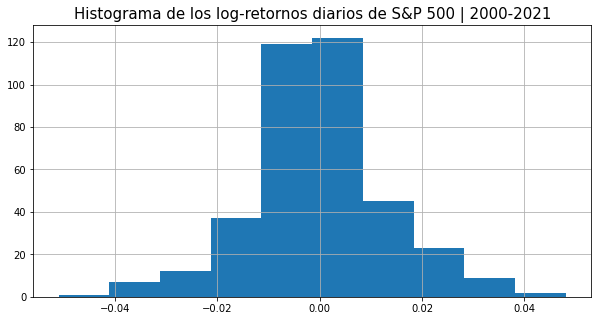

In [ ]:
plt.figure(figsize = (10,5))
sp500_diff['Close'].hist()
plt.title('Histograma de los log-retornos diarios de S&P 500 | 2000-2021', fontsize = 15)
plt.show()

Nuevamente, estaremos estimando 60 dìas de las observaciones, por lo que pasamos a definir el conjunto de entrenamiento.

In [ ]:
## Asignación del tamaó de conunto de entrenamiento
len_train = len(sp500_2020['Close'])-60
len_train

319

In [ ]:
len(sp500_diff['Close'])

377

In [ ]:
train = np.log(sp500_2020['Close'])[0:len_train]
test = np.log(sp500_2020['Close'])[len_train:]

In [ ]:
len(train)

319

In [ ]:
train

Date
2020-07-01    8.044261
2020-07-02    8.048791
2020-07-06    8.064548
2020-07-07    8.053671
2020-07-08    8.061468
                ...   
2021-09-29    8.380103
2021-09-30    8.368122
2021-10-01    8.379548
2021-10-04    8.366477
2021-10-05    8.376947
Name: Close, Length: 319, dtype: float64

In [ ]:
len(test)

60

In [ ]:
test

Date
2021-10-06    8.381041
2021-10-07    8.389305
2021-10-08    8.387390
2021-10-11    8.380500
2021-10-12    8.378081
2021-10-13    8.381098
2021-10-14    8.398018
2021-10-15    8.405450
2021-10-18    8.408819
2021-10-19    8.416185
2021-10-20    8.419843
2021-10-21    8.422834
2021-10-22    8.421761
2021-10-25    8.426498
2021-10-26    8.428316
2021-10-27    8.423252
2021-10-28    8.433033
2021-10-29    8.434980
2021-11-01    8.436779
2021-11-02    8.440453
2021-11-03    8.446893
2021-11-04    8.451066
2021-11-05    8.454792
2021-11-08    8.455679
2021-11-09    8.452175
2021-11-10    8.443915
2021-11-11    8.444466
2021-11-12    8.451662
2021-11-15    8.451651
2021-11-16    8.455509
2021-11-17    8.452904
2021-11-18    8.456283
2021-11-19    8.454884
2021-11-22    8.451681
2021-11-23    8.453337
2021-11-24    8.455628
2021-11-26    8.432641
2021-11-29    8.445755
2021-11-30    8.426612
2021-12-01    8.414726
2021-12-02    8.428821
2021-12-03    8.420336
2021-12-06    8.431999
2021-1

<Figure size 720x360 with 0 Axes>

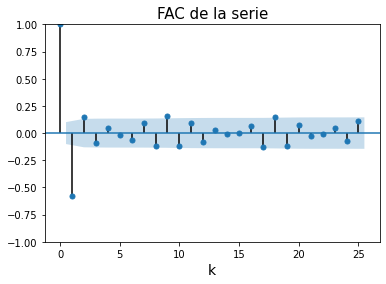

In [ ]:
plt.figure(figsize=(10,5))
plot_acf(sp500_diff['Close'], lags = 25)
plt.title('FAC de la serie', fontsize =15)
plt.xlabel('k', fontsize = 14)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/FAC_fin.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


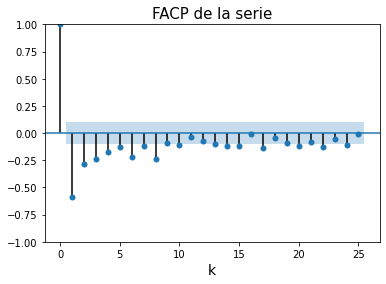

In [ ]:
plot_pacf(sp500_diff['Close'], lags = 25)
plt.title('FACP de la serie', fontsize = 15)
plt.xlabel('k', fontsize = 14)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/FACP_fin.png')
plt.show()

Calculo de los òrdenes por mètdodo de AIC

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-4
for p in range(4):
  # Loop over q values from 0-4
    for q in range(4):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(train, order=(p, 2, q))
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print('Criterio AIC')
print(order_df.sort_values('AIC'))

print('-'*99)

# Print order_df in order of increasing BIC
print('Criterio BIC')
print(order_df.sort_values('BIC'))

Criterio AIC
    p  q          AIC          BIC
13  3  1 -2069.534833 -2050.740324
9   2  1 -2069.080572 -2054.044965
5   1  1 -2068.475874 -2057.199168
11  2  3 -2068.433251 -2045.879840
3   0  3 -2068.051365 -2053.015757
2   0  2 -2067.910047 -2056.633342
15  3  3 -2067.035196 -2040.722883
1   0  1 -2066.628828 -2059.111025
14  3  2 -2065.084946 -2042.531535
7   1  3 -2063.908989 -2045.114480
6   1  2 -2062.919297 -2047.883690
10  2  2 -2059.019481 -2040.224973
12  3  0 -1997.649368 -1982.613761
8   2  0 -1976.098435 -1964.821730
4   1  0 -1958.105686 -1950.587882
0   0  0 -1821.453852 -1817.694951
---------------------------------------------------------------------------------------------------
Criterio BIC
    p  q          AIC          BIC
1   0  1 -2066.628828 -2059.111025
5   1  1 -2068.475874 -2057.199168
2   0  2 -2067.910047 -2056.633342
9   2  1 -2069.080572 -2054.044965
3   0  3 -2068.051365 -2053.015757
13  3  1 -2069.534833 -2050.740324
6   1  2 -2062.919297 -2047.883690

## ARIMA (2,2,1) SP 500 ---> 2020

In [ ]:
## Definición de los órdenes
N = len(train)
p = 2
d = 2
q = 1

t_prima = d+p+1  ## Sustento con base en el libro de Victor Guerrero.

In [ ]:
# Creamos la instancia del modelo.
model = SARIMAX(train, order=(p, d, q))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  319
Model:               SARIMAX(2, 2, 1)   Log Likelihood                1038.540
Date:                Mon, 21 Mar 2022   AIC                          -2069.081
Time:                        22:55:41   BIC                          -2054.045
Sample:                             0   HQIC                         -2063.075
                                - 319                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0992      0.048     -2.058      0.040      -0.194      -0.005
ar.L2          0.0905      0.040      2.246      0.025       0.012       0.170
ma.L1         -0.9987      0.102     -9.787      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
results.params

ar.L1    -0.099165
ar.L2     0.090523
ma.L1    -0.998670
sigma2    0.000082
dtype: float64

Adicional, generaremos las gráficas diagnòstico para verificar la validez del modelo.

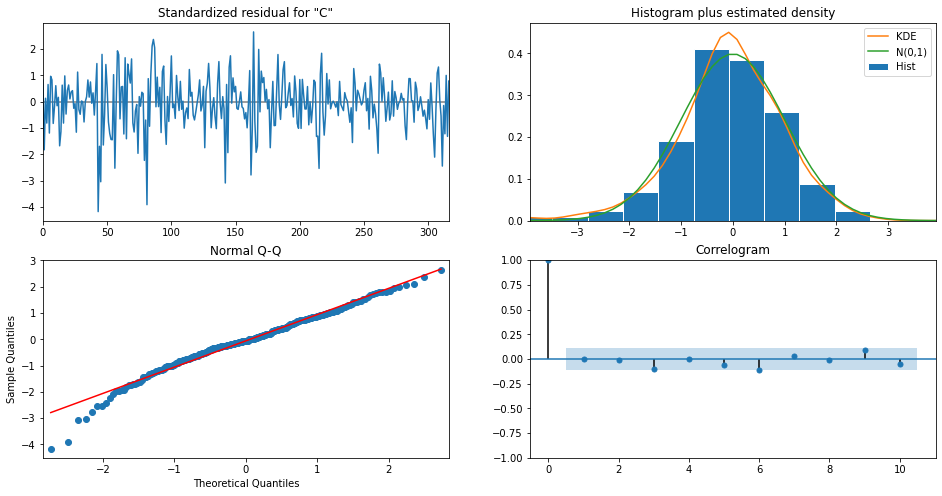

In [ ]:
## Grafica diagnostico de los residuales.
results.plot_diagnostics(figsize=(16,8))
plt.show()

Prueba de Kolmogorov para contraste de distribuciones

**Verificación del modelo**

1. Residuos con media cero.
2. Varianza de los residuos constante.
3. Independencia de los residuales (prueba de Ljung-Box).
4. Distirbución normal de los residuales (prueba no tan exigente).
5. No observaciones aberrantes (-3sigma,  3 sigma).

No tan necesrias:
6. Modelo cumple supuesto de parsimonia (verificado con seleccion por AIC-BIC).
7. El modelo es admisible (parámetros se encuentran en las regiones admisibles).
Valores de los coeficientes deben oscilar entre (-1,1) en caso de que se slgan de ese rango, podría indicar que se necesita una diferenciación adicional
8. Modelo estable en los parámetros.


De la inspeccion visual, podemos apreciar que el modelo no es admisible por diversos motivos:
1. Tiene coneficientes mayores a los permisibles.
2. Varianaza de los residuales no es constante.
3. Residuales no se distribuyn de forma normal, sino con una distribuciòn de colas más pesadas.
4. Existen resifuales que estàn correlacionados entre sì (Aunque se pasa la preba de Ljung - Box).



**1. Comprobación de que la media de los residuos es cercana a cero, contrastando si el cociente de M/sigma no sobrepasa 2**

Recordemos que deemosde tomar los residuos a partir de: d+p+1

In [ ]:
multiplicador = np.sqrt(N-d-p)
multiplicador

17.74823934929885

In [ ]:
residuos_2 = results.resid[t_prima:]

In [ ]:
media_mu = np.sum(residuos_2)/(multiplicador**2)
media_mu

-0.000525565423853169

La media de los residuos es un poco alta al cero esperado, pero contrastaremos calculando el cociente de:

$$
    m(a)/\sigma_{a}
$$


In [ ]:
num_sigma = N-d-p-q

In [ ]:
sigma_mu = np.sqrt(np.sum((residuos_2-media_mu)**2)/(num_sigma))
sigma_mu

0.00909009898443104

Es muy similar a la sigma_2 otorgada por el modelo de facto, por lo que la tomaremos de ahi.

In [ ]:
sigma_mu = np.sqrt(results.params[-1])
sigma_mu

0.009054651830666772

In [ ]:
cociente = multiplicador*media_mu/sigma_mu
cociente

-1.0301733419135621

El cociente sobrepasa el valor de 2, por lo que no puede ser admitido como un modelo vàlido para la serie de tiempo.

**4. Intervalo -2sigma_mu, 2_sigma_mu**


In [ ]:
# Observaciones admisibles fuera del rango de dist Normal
np.round((N-d-p)/20)

16.0

In [ ]:
#Calculamos el intervalo
c_inf = (-2*sigma_mu) + media_mu
c_sup = (2*sigma_mu) + media_mu

ab_inf = (-3*sigma_mu) + media_mu
ab_sup = (3*sigma_mu) + media_mu
# Imprimimos el estadístico y su p-value
#print("Estadístico de Dickey Fuller para Diff(ln(S&P 500)): " + '% 6.2f' %result[0])
#print("p-value:" + '% 6.2f' %result[1])
#print('\t%s: %.3f' % (key, value))
print("Intervalo = (%.2f,%.2f)" %(c_inf, c_sup))

Intervalo = (-0.02,0.02)


In [ ]:
fuera_intervalo = np.sum(residuos_2<c_inf) + np.sum(residuos_2>c_sup)
fuera_intervalo

16

Observamos que se cumple el supuesto de que no se tengan observaciones por encima del esperado que salgan del intervalo (-2*sigma, 2*sigma)

In [ ]:
## Número de observaciones aberrantes:
np.sum(residuos_2<ab_inf) + np.sum(residuos_2>ab_sup)


4

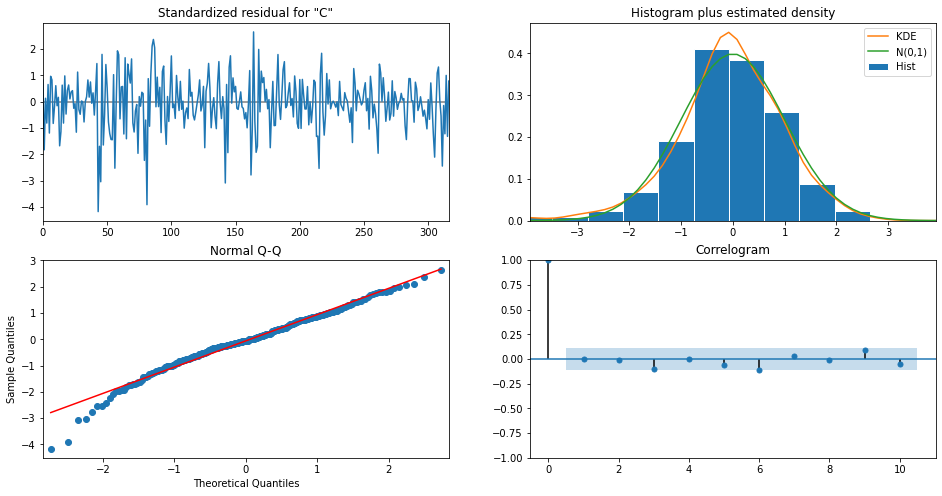

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Diagnstico_Residuales_Final.png')
plt.show()

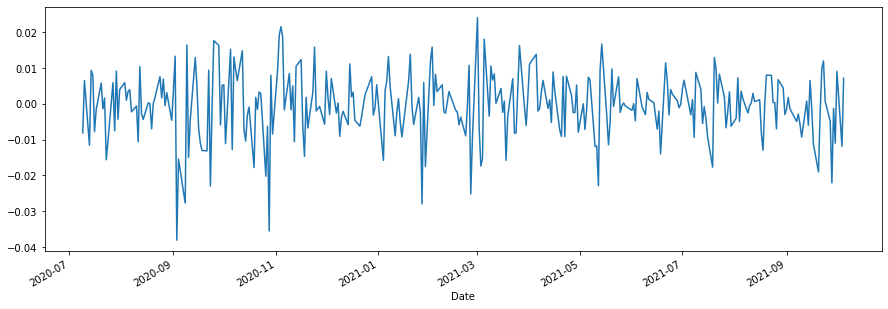

In [ ]:
plt.figure(figsize=(15,5))
residuos_2.plot()

In [ ]:
residuos_2[residuos_2<ab_inf]

Date
2020-09-03   -0.038145
2020-09-08   -0.027762
2020-10-28   -0.035559
2021-01-27   -0.027990
dtype: float64

In [ ]:
residuos_2[residuos_2>ab_sup]

Series([], dtype: float64)

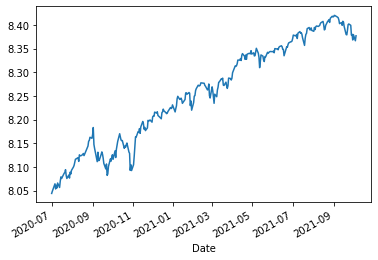

In [ ]:
train.plot()

## Predicciones

In [ ]:
# Generamos las predicciones
one_step_forecast = results.get_prediction(start=-10, dynamic=False)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

## Paso adicional, convertir los intervalos en un DataFrame.

# confidence_intervals  = pd.DataFrame(confidence_intervals, columns=['lower', 'upper'])

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Close']
upper_limits = confidence_intervals.loc[:,'upper Close']

# Print best estimate  predictions
print(mean_forecast)

Date
2021-09-22    8.378506
2021-09-23    8.388471
2021-09-24    8.401248
2021-09-27    8.403996
2021-09-28    8.400660
2021-09-29    8.381392
2021-09-30    8.379149
2021-10-01    8.370478
2021-10-04    8.378387
2021-10-05    8.369824
Name: predicted_mean, dtype: float64


In [ ]:
## Generamos predicciones para 60 observaciones futuras con el metodo get_forecast
forecast = results.get_forecast(steps = 60, dynamic=False)
mean = forecast.predicted_mean
conf_int = forecast.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
index_sp = test.index
conf_int.index = index_sp

In [ ]:
len_train

319

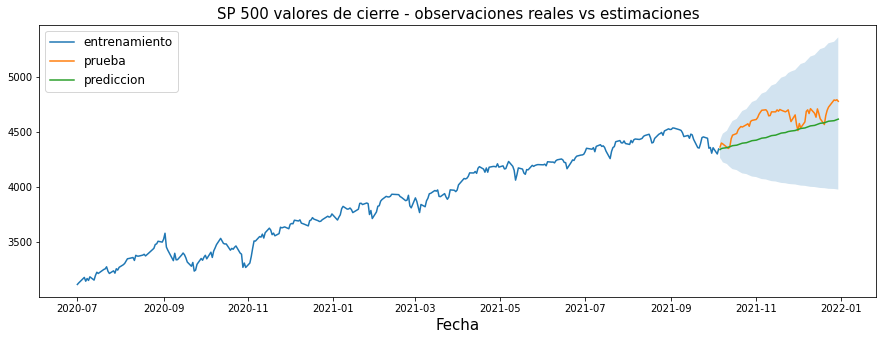

In [ ]:
plt.figure(figsize = (15,5))

# Graficamos el conjunto de entrenamiento
plt.plot(sp500_2020.index[:len_train],sp500_2020['Close'][:len_train], label='entrenamiento')

# Graficamos el conjunto de prueba.
plt.plot(sp500_2020.index[len_train:],sp500_2020['Close'][len_train:], label='prueba')


# Anexamos las predicciones a la grafica
plt.plot(conf_int.index, np.exp(mean), label='prediccion')

# inclusión de los intervalos de confianza
plt.fill_between(conf_int.index, np.exp(conf_int['lower Close']), np.exp(conf_int['upper Close']), alpha=0.2)

# Impresión de figuras
plt.title('SP 500 valores de cierre - observaciones reales vs estimaciones', fontsize = 15)
plt.xlabel('Fecha', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Predicciones_Dinamicas_Final.png')
plt.show()

**Observamos pequelas oscilaciones en el inicio de las estimaciones, sin embargo, estas comenzas a estabilizarse en un punto medio.**

One Step Ahead Predictions

In [ ]:
results.params

ar.L1    -0.099165
ar.L2     0.090523
ma.L1    -0.998670
sigma2    0.000082
dtype: float64

In [ ]:
sp500_diff['Close']

Date
2020-07-06    0.011226
2020-07-07   -0.026634
2020-07-08    0.018674
2020-07-09   -0.013457
2020-07-10    0.016071
                ...   
2021-12-23   -0.003924
2021-12-27    0.007540
2021-12-28   -0.014755
2021-12-29    0.002412
2021-12-30   -0.004395
Name: Close, Length: 377, dtype: float64

In [ ]:
results.params[0], results.params[1], results.params[2]

(-0.09916480791698626, 0.09052295711094495, -0.9986700426675865)

In [ ]:
results.resid.to_csv('/content/drive/My Drive/00 Tesina/resid.csv')

In [ ]:
# Aplicamos el operador de lag para 1 periodo de tiempo
sp500_diff_piv = np.log(sp500_2020).diff().dropna()

In [ ]:
sp500_diff_piv.to_csv('/content/drive/My Drive/00 Tesina/SP500_diff_piv.csv')

In [ ]:
len_train

319

In [ ]:
sp500_diff_piv['Close'][len_train+1]

-0.0019155566024213755

In [ ]:
pivot_1 = np.log(sp500_2020['Close'][len_train-1])
pivot_2 = sp500_diff_piv['Close'][len_train-2]

In [ ]:
pivot_1

8.376946781119507

In [ ]:
pivot_2

0.010469517498600922

In [ ]:
len_train

319

In [ ]:
results.params

ar.L1    -0.099165
ar.L2     0.090523
ma.L1    -0.998670
sigma2    0.000082
dtype: float64

In [ ]:
 sp500_diff['Close'][len_train-2]

-0.006375118148977066

In [ ]:
sp500_diff['Close'][len_train-d-2]

-0.02449690416197825

In [ ]:
sp500_diff['Close'][len_train-2+1]

0.004169639875442499

In [ ]:
## Se genera una lista vacía que almancenará las prediciones
predict = []

## Creamos la variable pivote que contiene información de la diferenciación para
## el tiempo t-1 y t-2 del conjunto de prueba.
pivot_1 = np.log(sp500_2020['Close'][len_train-1])
pivot_2 = sp500_diff_piv['Close'][len_train-2]

## Creamos la lista que irá almacenando los errores.
error = []
error.append(results.resid[-1])


for i in range(60):
  # Se crea la prediccion en t con base en los valores reales en t-1 y t-2
  p =  sp500_diff['Close'][len_train+i-d-1]*results.params[0] + sp500_diff['Close'][len_train+i-d-2]*results.params[1] + error[i]*results.params[2]

  # Computo del error en t.
  error.append(p-sp500_diff['Close'][len_train-2+i])
  print(p)
  # Anexion de a predicción al vector de predicciones
  predict.append(p)

# Convertimos la lista de predicciones en un arreglo de numpy.
predict= np.array(predict)


## Se aplica la integración para tener predicción final.
predict[0] = pivot_2+predict[0]
predict = np.cumsum(predict)
predict[0] = pivot_1 + predict[0]
predict = np.cumsum(predict)

-0.011664786308208126
0.008045773408164762
-0.004861554524617324
-0.003924062738327434
-0.001476678846436113
0.0050450150362335005
0.0002575133700402006
0.012739270255716837
-0.019997233080740064
0.015456799652413417
-0.012208704844378141
0.009218199747390453
-0.010140689212890084
0.006410860462629207
-0.00154406170901303
-0.0005575374981278268
-0.0058982794357092146
0.018621157454619258
-0.024299109331196375
0.023423642429106765
-0.021719270340200318
0.024348958378602265
-0.026105531740589504
0.02546315858325903
-0.02802299714883946
0.023777881000433966
-0.02842094740819018
0.03587792657768592
-0.029054615996486895
0.023134454244848078
-0.020276371925356338
0.014786277469620706
-0.009968932138627793
0.006198896450293108
-0.008244695553756842
0.012440366687525892
-0.011412457472253945
-0.011283101324429726
0.04145273577738052
-0.06714518575437242
0.0706643316567493
-0.0465440422176867
0.028523930500947328
-0.012407540262492682
0.02216014293490643
-0.036996025728680264
0.026116677647673

In [ ]:
predict

array([8.37575151, 8.38260202, 8.38459097, 8.38265585, 8.37924406,
       8.38087729, 8.38276802, 8.39739803, 8.3920308 , 8.40212038,
       8.40000125, 8.40710032, 8.4040587 , 8.40742793, 8.40925311,
       8.41052075, 8.40589012, 8.41988063, 8.40957204, 8.42268709,
       8.41408288, 8.42982762, 8.41946682, 8.43456919, 8.42164856,
       8.43250581, 8.41494211, 8.43325634, 8.42251596, 8.43491003,
       8.42702772, 8.43393169, 8.43086674, 8.43400067, 8.42888992,
       8.43621953, 8.43213668, 8.41677073, 8.44285751, 8.40179911,
       8.43140504, 8.41446693, 8.42605275, 8.42523103, 8.44656946,
       8.43091185, 8.44137093, 8.43984822, 8.43499957, 8.43329195,
       8.44993127, 8.42790886, 8.44083143, 8.41771372, 8.45664091,
       8.42949766, 8.46412876, 8.44349437, 8.46546253, 8.44571839])

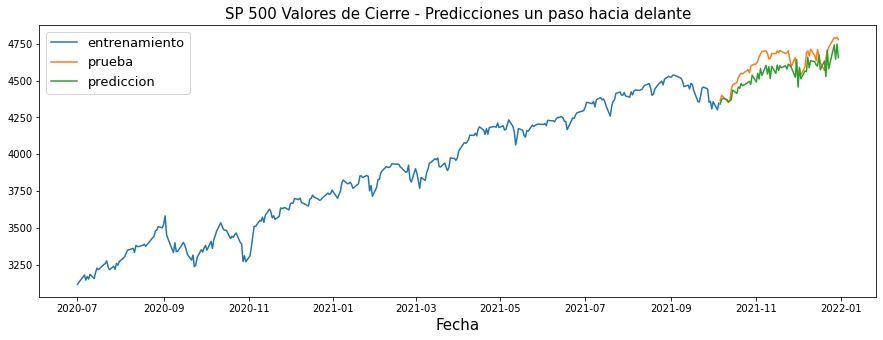

In [ ]:
# Grafica de predicciones.
plt.figure(figsize = (15,5))
plt.plot(sp500_2020.index[:len_train],sp500_2020['Close'][:len_train], label='entrenamiento')

plt.plot(sp500_2020.index[len_train:],sp500_2020['Close'][len_train:], label='prueba')
plt.plot(conf_int.index, np.exp(predict), label='prediccion')

plt.title('SP 500 Valores de Cierre - Predicciones un paso hacia delante', fontsize = 15)
plt.xlabel('Fecha', fontsize = 15)
plt.legend(fontsize = 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Modelo/Predicciones_One_Step_Final.png')
plt.show()

In [ ]:
len(predict)

60

In [ ]:
test

Date
2021-10-06    8.381041
2021-10-07    8.389305
2021-10-08    8.387390
2021-10-11    8.380500
2021-10-12    8.378081
2021-10-13    8.381098
2021-10-14    8.398018
2021-10-15    8.405450
2021-10-18    8.408819
2021-10-19    8.416185
2021-10-20    8.419843
2021-10-21    8.422834
2021-10-22    8.421761
2021-10-25    8.426498
2021-10-26    8.428316
2021-10-27    8.423252
2021-10-28    8.433033
2021-10-29    8.434980
2021-11-01    8.436779
2021-11-02    8.440453
2021-11-03    8.446893
2021-11-04    8.451066
2021-11-05    8.454792
2021-11-08    8.455679
2021-11-09    8.452175
2021-11-10    8.443915
2021-11-11    8.444466
2021-11-12    8.451662
2021-11-15    8.451651
2021-11-16    8.455509
2021-11-17    8.452904
2021-11-18    8.456283
2021-11-19    8.454884
2021-11-22    8.451681
2021-11-23    8.453337
2021-11-24    8.455628
2021-11-26    8.432641
2021-11-29    8.445755
2021-11-30    8.426612
2021-12-01    8.414726
2021-12-02    8.428821
2021-12-03    8.420336
2021-12-06    8.431999
2021-1

In [ ]:
np.sqrt(np.mean((np.exp(predict)-np.exp(test))**2))

87.74214463305856

In [ ]:
np.exp(test)

Date
2021-10-06    4363.549805
2021-10-07    4399.759766
2021-10-08    4391.339844
2021-10-11    4361.189941
2021-10-12    4350.649902
2021-10-13    4363.799805
2021-10-14    4438.259766
2021-10-15    4471.370117
2021-10-18    4486.459961
2021-10-19    4519.629883
2021-10-20    4536.189941
2021-10-21    4549.779785
2021-10-22    4544.899902
2021-10-25    4566.479980
2021-10-26    4574.790039
2021-10-27    4551.680176
2021-10-28    4596.419922
2021-10-29    4605.379883
2021-11-01    4613.669922
2021-11-02    4630.649902
2021-11-03    4660.569824
2021-11-04    4680.060059
2021-11-05    4697.529785
2021-11-08    4701.700195
2021-11-09    4685.250000
2021-11-10    4646.709961
2021-11-11    4649.270020
2021-11-12    4682.850098
2021-11-15    4682.799805
2021-11-16    4700.899902
2021-11-17    4688.669922
2021-11-18    4704.540039
2021-11-19    4697.959961
2021-11-22    4682.939941
2021-11-23    4690.700195
2021-11-24    4701.459961
2021-11-26    4594.620117
2021-11-29    4655.270020
2021-11

In [ ]:
np.exp(predict)

array([4340.52901407, 4370.36591026, 4379.06700001, 4370.60120577,
       4355.71503438, 4362.83470306, 4371.09147884, 4435.51065594,
       4411.76804112, 4456.50621505, 4447.07229342, 4478.75468951,
       4465.15271356, 4480.22225633, 4488.40692714, 4494.10022206,
       4473.33777614, 4536.36193423, 4489.83864281, 4549.11093914,
       4510.13730367, 4581.71021195, 4534.48513288, 4603.48631912,
       4544.38898303, 4593.9973707 , 4514.01424913, 4597.44661062,
       4548.33248247, 4605.05561331, 4568.89984764, 4600.55255001,
       4586.4736333 , 4600.86990308, 4577.41595628, 4611.08988273,
       4592.30188148, 4522.27618448, 4641.80005378, 4455.07472373,
       4588.94323525, 4511.86979002, 4564.44749145, 4560.69833347,
       4659.06217493, 4586.68056919, 4634.90475437, 4627.85249871,
       4605.46799614, 4597.61032734, 4674.75143446, 4572.92743589,
       4632.40490631, 4526.54265259, 4706.222794  , 4580.19871923,
       4741.59452389, 4644.75716345, 4747.92294283, 4655.09867

In [ ]:
sp500_2020.to_csv('/content/drive/My Drive/00 Tesina/SP500_2020.csv')

In [ ]:
sp500_diff.to_csv('/content/drive/My Drive/00 Tesina/SP500_diff.csv')

## Importación de los resultados de LSTM y comparativo de predicciones en el periodo oct '21- dic '21

In [ ]:
import pickle

path = '/content/drive/My Drive/00 Tesina/Graficas/LSTM/'

pickle_in = open(path+'LSTM_Multi_15.pickle','rb')

multi_model_15 = pickle.load(pickle_in)

In [ ]:
path = '/content/drive/My Drive/00 Tesina/Graficas/LSTM/'

pickle_in = open(path+'LSTM_Multi_2bis.pickle','rb')

multi_model_2 = pickle.load(pickle_in)

In [ ]:
## Definmos una funciòn que nos ayudará a hacer la separación de secuencias

def sep_secuencia(secuencia, n_pasos_dentro, n_pasos_fuera):
  X, y = list(), list()

  for i in range(len(secuencia)):

    # Primero encontramos el final de la secuencia
    end_ix = i + n_pasos_dentro
    out_end_ix = end_ix + n_pasos_fuera

    #Checamos si estamos fuera del rango de la secuencia:
    if out_end_ix >len(secuencia):
      break

    # Juntamos los inputs y outputs para el patron

    seq_x, seq_y = secuencia[i:end_ix], secuencia[end_ix: out_end_ix]
    X.append(seq_x)
    y.append(seq_y)

  return np.array(X), np.array(y)

Ajustamos los datos la escala y estructura necesarios

In [ ]:
##Crearemos un dataframe con solo los valores de cierre en un arreglo de numpy
cierre = sp500['Close'].values
cierre

array([1455.2199707 , 1399.42004395, 1402.10998535, ..., 4786.35009766,
       4793.06005859, 4778.72998047])

In [ ]:
sp500.shape

(5535, 9)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## Escalamos los datos
scaler  = MinMaxScaler(feature_range=(0,1))
datos_escalados = scaler.fit_transform(cierre.reshape(-1,1))

In [ ]:
datos_escalados

array([[0.18916173],
       [0.17560664],
       [0.17626009],
       ...,
       [0.99837   ],
       [1.        ],
       [0.99651889]])

In [ ]:
## Definición del número de entradas y salidas del modelo
n_steps_in = 15
n_steps_out = 1

## Aplicación de transformación
X, y = sep_secuencia(datos_escalados, n_steps_in, n_steps_out)

n_features = 1

## Re dimensionamiento de la serie
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Definición de conjunto entrenamiento
training_data_len = int(len(datos_escalados) - 60)

X_train = X[:training_data_len]
y_train = y[:training_data_len]

# Seleccionamos el conjunto de prueba
test_data_len = int(60)
X_test = X[-test_data_len:]
y_test = y[-test_data_len:]

In [ ]:
X_test.shape

(60, 15, 1)

In [ ]:
## Obtenemos las predicciones para X_test
y_pred_LSTM_15= multi_model_15.predict(X_test)

## Desesclamos los datos, para obtener el valor "real".
y_pred_LSTM_15 = scaler.inverse_transform(y_pred_LSTM_15)
y_test = cierre[-test_data_len:]

In [ ]:
## Definición del número de entradas y salidas del modelo
n_steps_in = 2
n_steps_out = 1

## Aplicación de transformación
X, y = sep_secuencia(datos_escalados, n_steps_in, n_steps_out)

n_features = 1

## Re dimensionamiento de la serie
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Definición de conjunto entrenamiento
training_data_len = int(len(datos_escalados) - 60)

X_train = X[:training_data_len]
y_train = y[:training_data_len]

# Seleccionamos el conjunto de prueba
test_data_len = int(60)
X_test = X[-test_data_len:]
y_test = y[-test_data_len:]

## Obtenemos las predicciones para X_test
y_pred_LSTM_2= multi_model_2.predict(X_test)

## Desesclamos los datos, para obtener el valor "real".
y_pred_LSTM_2 = scaler.inverse_transform(y_pred_LSTM_2)
y_test = cierre[-test_data_len:]



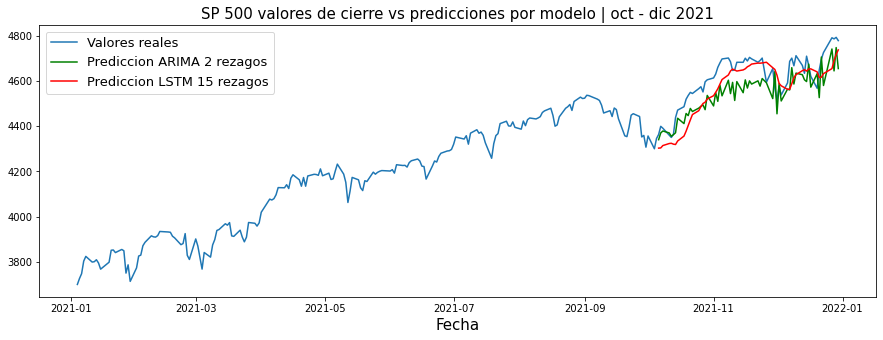

In [ ]:
# Grafica de predicciones.
plt.figure(figsize = (15,5))
plt.plot(sp500['2021':].index, sp500['Close']['2021':], label='Valores reales')

#plt.plot(sp500_2020.index[len_train:],sp500_2020['Close'][len_train:], label='prueba')
plt.plot(conf_int.index, np.exp(predict), label='Prediccion ARIMA 2 rezagos', linestyle ='-', color = 'green')
#plt.plot(conf_int.index, y_pred_LSTM_2, label='Prediccion LSTM 2 rezagos', linestyle='--', color='')
plt.plot(conf_int.index, y_pred_LSTM_15, label='Prediccion LSTM 15 rezagos', linestyle='-', color='r')

plt.title('SP 500 valores de cierre vs predicciones por modelo | oct - dic 2021', fontsize = 15)
plt.xlabel('Fecha', fontsize = 15)
plt.legend(fontsize = 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/LSTM/Comparativo_ARIMA_LSTM.png')
plt.show()

In [ ]:
mse_ARIMA = np.sqrt(np.mean((np.exp(predict)-np.exp(test))**2))
mse_LSTM_2 = np.sqrt(np.mean((y_pred_LSTM_2[:,0]-np.exp(test))**2))
mse_LSTM_15 = np.sqrt(np.mean((y_pred_LSTM_15[:,0]-np.exp(test))**2))

In [ ]:
print('ECM ARIMA: ', mse_ARIMA)
print('ECM LSTM_2: ', mse_LSTM_2)
print('ECM LSTM_15: ', mse_LSTM_15)

ECM ARIMA:  87.74214463305856
ECM LSTM_2:  50.0978226651902
ECM LSTM_15:  76.82517223465086


In [ ]:
y_pred_LSTM_15

array([[4303.3647],
       [4304.154 ],
       [4314.646 ],
       [4323.6265],
       [4324.7563],
       [4320.88  ],
       [4319.3247],
       [4334.7676],
       [4356.5654],
       [4378.1997],
       [4403.2554],
       [4427.866 ],
       [4451.7485],
       [4468.8574],
       [4486.6196],
       [4500.725 ],
       [4506.334 ],
       [4520.387 ],
       [4535.1074],
       [4549.7124],
       [4565.653 ],
       [4586.0884],
       [4606.5464],
       [4626.843 ],
       [4644.455 ],
       [4652.696 ],
       [4648.4795],
       [4644.095 ],
       [4649.078 ],
       [4654.148 ],
       [4662.95  ],
       [4667.912 ],
       [4674.9707],
       [4679.336 ],
       [4678.819 ],
       [4679.9873],
       [4682.9707],
       [4658.8457],
       [4651.039 ],
       [4625.911 ],
       [4589.4673],
       [4578.904 ],
       [4563.161 ],
       [4563.3115],
       [4588.0063],
       [4614.032 ],
       [4628.345 ],
       [4645.574 ],
       [4650.3516],
       [4643.901 ],


In [ ]:
np.exp(test)

Date
2021-10-06    4363.549805
2021-10-07    4399.759766
2021-10-08    4391.339844
2021-10-11    4361.189941
2021-10-12    4350.649902
2021-10-13    4363.799805
2021-10-14    4438.259766
2021-10-15    4471.370117
2021-10-18    4486.459961
2021-10-19    4519.629883
2021-10-20    4536.189941
2021-10-21    4549.779785
2021-10-22    4544.899902
2021-10-25    4566.479980
2021-10-26    4574.790039
2021-10-27    4551.680176
2021-10-28    4596.419922
2021-10-29    4605.379883
2021-11-01    4613.669922
2021-11-02    4630.649902
2021-11-03    4660.569824
2021-11-04    4680.060059
2021-11-05    4697.529785
2021-11-08    4701.700195
2021-11-09    4685.250000
2021-11-10    4646.709961
2021-11-11    4649.270020
2021-11-12    4682.850098
2021-11-15    4682.799805
2021-11-16    4700.899902
2021-11-17    4688.669922
2021-11-18    4704.540039
2021-11-19    4697.959961
2021-11-22    4682.939941
2021-11-23    4690.700195
2021-11-24    4701.459961
2021-11-26    4594.620117
2021-11-29    4655.270020
2021-11

In [ ]:
pd.DataFrame([y_pred_LSTM_15[:,0], np.exp(predict), np.exp(test)]).to_csv('/content/drive/My Drive/00 Tesina/Graficas/LSTM/tabla_predicciones.csv')

Forward Validation

In [ ]:
%%time

## Walk Forward Validation


history = [x for x in train]
predictions = []

for t in range(int(len(test))):
    try:
      model = SARIMAX(history, order=(2,2,0))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test[t]
      history.append(obs)
      print(t)
      print('prediccion = %f, esperado=%f' % (yhat, obs))
    except:
      obs = test[t]
      yhat = obs
      predictions.append(yhat)
      history.append(obs)
      print(t)
      print('prediccion = %f, esperado=%f' % (yhat, obs))

      pass

In [ ]:
predictions-obs

In [ ]:
(predictions-obs)**2

In [ ]:
np.mean((predictions-obs)**2)

In [ ]:
index_sp = test.index

In [ ]:
plt.figure(figsize = (15,5))

# Plot past CO2 levels
plt.plot(sp500_2020.index,np.log(sp500_2020['Close']), label='observados')

# Plot the prediction means as line
plt.plot(test.index, predictions, label='prediccion')

# Shade between the confidence intervals
#plt.fill_between(conf_int.index, conf_int['lower Close'], conf_int['upper Close'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [ ]:
model_fit.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
print(model_fit.summary())

In [ ]:
print(results.summary())

In [ ]:
pred = results.predict(1500, len(sp500['Close'].iloc[:-60])+60-1, dynamic = False)

In [ ]:
pred = results.predict(len(sp500['Close'].iloc[:-60]), len(sp500['Close'].iloc[:-60])+60-1, dynamic = False)

In [ ]:
len(pred)

In [ ]:
pred.index = index_sp

In [ ]:
plt.figure(figsize = (15,5))

# Plot past CO2 levels
plt.plot(sp500['2020-06-01':].index, sp500['Close']['2020-06-01':], label='observados')

# Plot the prediction means as line
plt.plot(pred.index, pred, label='prediccion')

# Shade between the confidence intervals
#plt.fill_between(conf_int.index, conf_int['lower Close'], conf_int['upper Close'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

Modelo SARIMA

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Definimos el periodo a 7, con base en la información que encontramos
decomp = seasonal_decompose(sp500['Close'], period = 7)

# Plot decomposition
plt.figure(figsize=(10,10))
decomp.plot()
plt.show()

In [ ]:
import pmdarima as pm

In [ ]:
## Modelo autoARIMA.

results = pm.auto_arima(np.log(sp500_2020['Close'].iloc[:-60]),          # Datos
                        d = 2,       # Non-seasonal difference order
                        start_p= 1,  # initial gues for p
                        start_q = 1,  # initial guess for q
                        max_p = 3,   # max value or p to to test..
                        max_q = 3,
                        seasonal = True, # Especificar si la serie es estacional
                        m = 9,       # Número de periodos en cada ciclo.
                        D = 1,        # Orden de diferenciacion del ciclo.
                        start_P = 1,
                        start_Q = 1,
                        max_P = 2,
                        max_Q = 2,
                        information_criterion = 'aic', #Criterio de info a usar
                        trace = True, # Elegir si se van marcando los resultados
                        error_action ='ignore', # qué hacer si hay errores.
                        stepwise = True)  # Entrenar stepwise.

In [ ]:
# Print model summary
print(results.summary())

In [ ]:
results.plot_diagnostics(figsize=(16,8))
#plt.savefig()
plt.show()

In [ ]:
final = SARIMAX(np.log(sp500_2020['Close'].iloc[:-60]), order = (1,2,1), seasonal_order = (2,1,1,9))
res = final.fit()
print(res.summary())

In [ ]:
forecast = res.get_forecast(steps = 60)
mean = forecast.predicted_mean
conf_int = forecast.conf_int()

In [ ]:
index_sp = sp500['Close'].iloc[-60:].index
conf_int.index = index_sp

In [ ]:
plt.figure(figsize = (15,5))

# Plot past CO2 levels
plt.plot(sp500['2020-10-01':].index, sp500['Close']['2020-10-01':], label='observados')

# Plot the prediction means as line
plt.plot(conf_int.index, np.exp(mean), label='prediccion')

# Shade between the confidence intervals
#plt.fill_between(conf_int.index, np.exp(conf_int['lower Close']), np.exp(conf_int['upper Close']), alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

## Graficas de funciones activación y ejemplos de procesos ARMA.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(2)

def randomwalk1D(n):
    x, y = 0, 10
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)

        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions

In [ ]:
np.random.seed(2)
time_data, pos_data = randomwalk1D(500)
plt.figure(figsize=(10,5))
plt.plot(time_data, pos_data, 'b-')
plt.title("Serie no estacionaria", fontsize=15)
plt.ylabel(r'$y_t$', fontsize= 15)
plt.xlabel(r'$t$', fontsize=15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Serie_NoEstacionaria.png')
plt.show()

In [ ]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients

## Para defininr un modelo MA(1) solo se enuncia el coeficiente del lag 0, (que siempre es 1) en los coeficientes de AR.
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=500)+10

## Equivale a :
# y = arma_generate_sample([1], [1, -0.7], nsample=100)

plt.figure(figsize=(10,5))
plt.plot(y, 'b-')
plt.ylabel(r'$y_t$', fontsize=15)
plt.xlabel(r'$t$', fontsize=15)
plt.title('Serie estacionaria',fontsize=15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Serie_Estacionaria.png')
plt.show()

In [ ]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients

## Para defininr un modelo MA(1) solo se enuncia el coeficiente del lag 0, (que siempre es 1) en los coeficientes de AR.
ar_coefs = [1]
ma_coefs = [1, 0.75]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=300)

## Equivale a :
# y = arma_generate_sample([1], [1, -0.7], nsample=100)


plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel(r'$y_t$', fontsize = 14)
plt.xlabel(r'$t$', fontsize = 14)
plt.title('MA(1) --- ARMA(0,1)', fontsize = 15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/MA(1).png')
plt.show()

In [ ]:
## Importamos las funciones de acf y pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
## Graficas de autocorrelación y correlación parcial
plot_acf(y, lags = 15)
plt.title('FAC --- MA(1)', fontsize = 15)
plt.xlabel('k - desfases', fontsize = 13)
plt.ylabel(r'$\rho(k)$', fontsize = 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/FAC-MA(1).png')
plt.show()

In [ ]:
plot_pacf(y, lags = 15)
plt.title('FACP -  MA(1)', fontsize = 15)
plt.xlabel('k - desfases', fontsize = 13)
plt.ylabel(r'$\phi(k,k)$', fontsize = 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/FACP-MA(1).png')
plt.show()

In [ ]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1,-0.75]
ma_coefs = [1, 0.75]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=500)

plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel(r'$y_t$', fontsize = 13)
plt.xlabel(r'$t$', fontsize = 13)
plt.title('AR(1) --- ARMA(1,1)', fontsize = 15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/ARMA(1,1).png')
plt.show()

In [ ]:
plot_acf(y, lags = 15)
plt.title('FAC -  ARMA(1,1)', fontsize = 15)
plt.xlabel('k - desfases', fontsize = 13)
plt.ylabel(r'$\rho(k)$', fontsize = 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/FAC-ARMA(1,1).png')
plt.show()

In [ ]:
plot_pacf(y, lags = 15)
plt.title('FACP -  ARMA(1,1)', fontsize = 15)
plt.xlabel('k - desfases', fontsize = 13)
plt.ylabel(r'$\phi(k)$', fontsize = 13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/FACP-ARMA(1,1).png')
plt.show()

In [ ]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1,-0.75]
ma_coefs = [1, ]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=500)

plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel(r'$y_t$', fontsize = 13)
plt.xlabel(r'$t$', fontsize = 13)
plt.title('AR(1) --- ARMA(1,0)', fontsize = 15)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/AR(1).png')
plt.show()

In [ ]:
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot

data = np.array(data)
data = data + 10


plt.figure(figsize=(10,5))
plt.plot(data, 'b-')
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.title('Serie no estacionaria')
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Serie_Vrianza.png')
plt.show()

In [ ]:
type(data)

Funicones de activación

In [ ]:
in_array = np.linspace(-5,5, 1000)
out_array = np.tanh(in_array)
cero = np.zeros(1000)
one = cero+1
minus_one = cero-1

#print("in_array : ", in_array)
#print("\nout_array : ", out_array)

# red for numpy.tanh()
plt.figure(figsize = (10,5))
plt.plot(in_array, out_array, color = 'blue')
plt.grid()
#plt.plot(in_array, cero, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(cero, out_array, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, one, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, minus_one, color = 'black', linestyle= '--', linewidth=1)
plt.title(r'$tanh(x)$', fontsize=15)
plt.xlabel("X", fontsize=13)
plt.ylabel("Y", fontsize=13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Tanh.png')
plt.show()

In [ ]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

In [ ]:
in_array = np.linspace(-5,5, 1000)
out_array = sigmoid(in_array)
cero = np.zeros(1000)
one = cero+1
minus_one = cero-1

#print("in_array : ", in_array)
#print("\nout_array : ", out_array)

# red for numpy.tanh()
plt.figure(figsize = (10,5))
plt.plot(in_array, out_array, color = 'blue')
plt.grid()
#plt.plot(in_array, cero, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(cero, out_array, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, one, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, minus_one, color = 'black', linestyle= '--', linewidth=1)
plt.title(r'$\sigma(x)$',fontsize=15)
plt.xlabel("X", fontsize=13)
plt.ylabel("Y", fontsize=13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Sig.png')
plt.show()

In [ ]:
def ReLU(x):
    a = []
    for item in x:
      if item<0:
        a.append(0)
      else:
        a.append(item)
    return a

In [ ]:
in_array = np.linspace(-5,5, 1000)
out_array = ReLU(in_array)

# red for numpy.tanh()
plt.figure(figsize = (10,5))
plt.plot(in_array, out_array, color = 'blue')
plt.grid()
#plt.plot(in_array, cero, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(cero, out_array, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, one, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, minus_one, color = 'black', linestyle= '--', linewidth=1)
plt.title(r'$ReLU(x)$', fontsize=15)
plt.xlabel("X", fontsize=13)
plt.ylabel("Y", fontsize=13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/ReLU.png')
plt.show()

In [ ]:
def softmax(x):

    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

In [ ]:
in_array = np.linspace(-5,5, 1000)
out_array = softmax(in_array)

# red for numpy.tanh()
plt.figure(figsize = (10,5))
plt.plot(in_array, out_array, color = 'blue')
plt.grid()
#plt.plot(in_array, cero, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(cero, out_array, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, one, color = 'black', linestyle= '--', linewidth=1)
#plt.plot(in_array, minus_one, color = 'black', linestyle= '--', linewidth=1)
plt.title(r'$softmax(x)$', fontsize=15)
plt.xlabel("X", fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.savefig('/content/drive/My Drive/00 Tesina/Graficas/Soft.png')
plt.show()